# Wine

The wine dataset contains the results of a chemical analysis of wines grown in a specific area of Italy. Three types of wine are represented in the 178 samples, with the results of 13 chemical analyses recorded for each sample. The Type variable has been transformed into a categoric variable.

The data contains no missing values and consits of only numeric data, with a three class target variable (Type) for classification.

In [1]:
from sklearn.datasets import load_wine

dt = load_wine()

## About This File

A data frame containing 178 observations of 13 variables.

Alcohol - Alcohol

Malic- Malic acid

Ash - Ash

Alcalinity - Alcalinity of ash

Magnesium - Magnesium

Phenols - Total phenols

Flavanoids - Flavanoids

Nonflavanoids - Nonflavanoid phenols

Proanthocyanins - Proanthocyanins

Color - Color intensity.

Hue - Hue

Dilution - D280/OD315 of diluted wines.

Proline - Proline

In [3]:
import pandas as pd

wine = pd.DataFrame(dt['data'], columns=dt['feature_names'])
wine['TARGET'] = dt['target']

In [4]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  TARGE

In [6]:
from sklearn import preprocessing
from sklearn import impute

hue_binarizer = preprocessing.Binarizer(threshold=wine['hue'].mean())
hue_binarizer.fit(wine['hue'].values.reshape(-1,1))
wine['hue_bin'] = hue_binarizer.transform(wine['hue'].values.reshape(-1,1)).astype(int)

In [7]:
proline_kbins = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal')
proline_kbins.fit(wine['proline'].values.reshape(-1,1))
wine['proline_bin'] = proline_kbins.transform(wine['proline'].values.reshape(-1,1)).astype(int)

wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET,hue_bin,proline_bin
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1,1


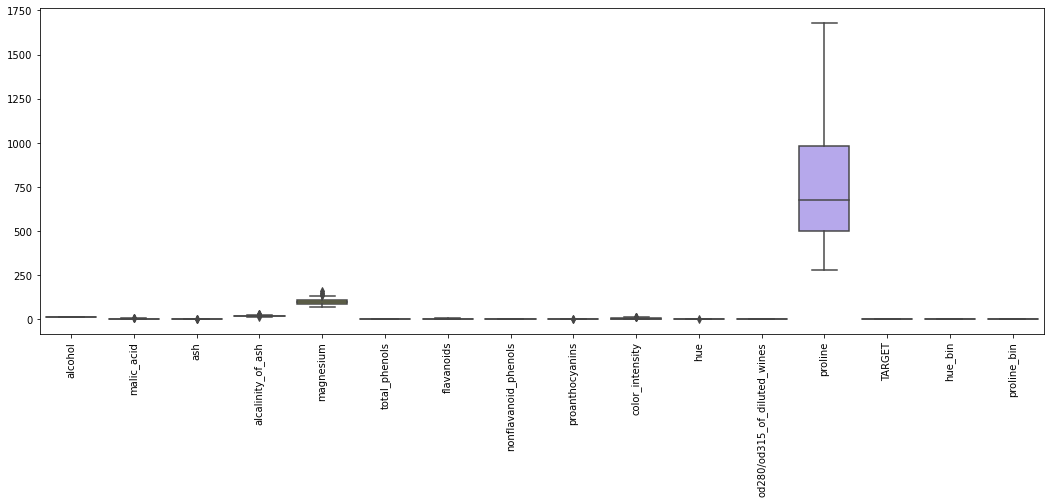

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18, 6))
sns.boxplot(data=wine)
plt.xticks(rotation=90)
plt.show()

In [9]:
wine_ss = wine.copy().drop(['TARGET', 'hue_bin', 'proline_bin'], axis=1)
scaler = preprocessing.StandardScaler().fit(wine_ss)



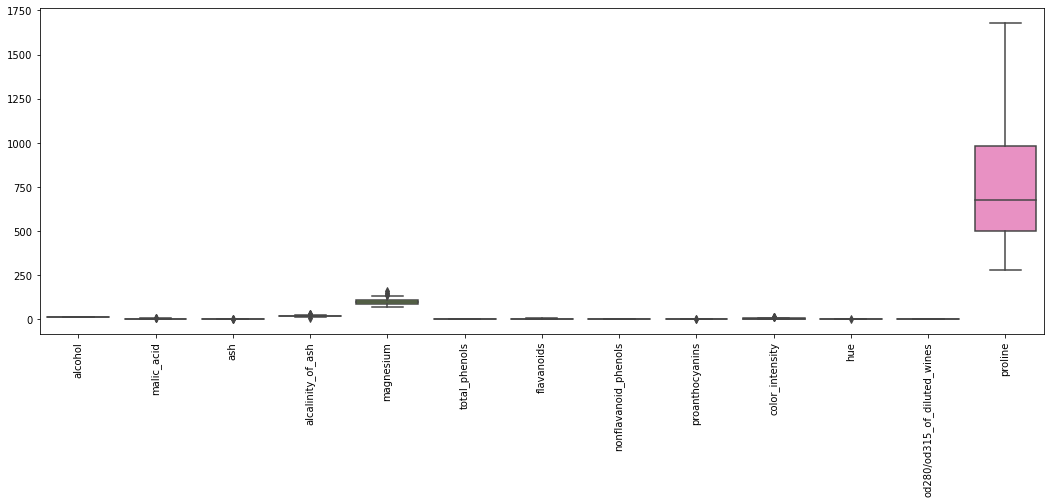

In [10]:
plt.figure(figsize = (18, 6))
sns.boxplot(data=wine_ss)
plt.xticks(rotation=90)
plt.show()

In [11]:
from sklearn import impute

imputer_mean = impute.SimpleImputer()

pd.DataFrame(imputer_mean.fit_transform(wine.drop(['TARGET', 'hue_bin', 'proline_bin'],axis=1)), 
             columns = wine_ss.columns).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'TARGET', 'hue_bin',
       'proline_bin'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split

x = wine[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
             'proanthocyanins', 'color_intensity', 'hue',
             'od280/od315_of_diluted_wines', 'proline']]

y = wine.TARGET.values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [15]:
model = rfc.fit(x_train, y_train)

pred = model.predict(x_test)

In [16]:
print(pred,"\n")

print(y_test)

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 0 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 0 0] 

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 2 1 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 0 0]


In [17]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy score is {:.2f}%\n".format(accuracy_score(y_test, pred)*100))

Accuracy score is 97.78%



In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<AxesSubplot:>

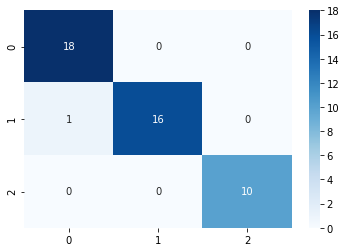

In [19]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap = 'Blues')

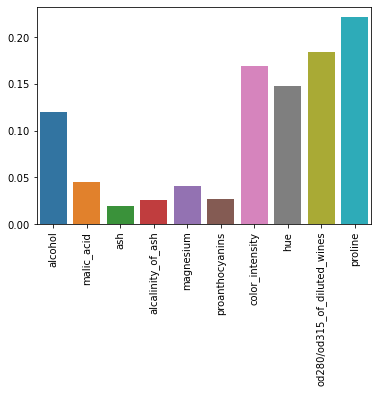

In [20]:
sns.barplot(x = x_test.columns, y = rfc.feature_importances_)
plt.xticks(rotation = 90)
plt.show()